In [ ]:
# Run if dependencies are not installed
# !pip3 install -r torch datasets av

In [ ]:
!pip3 install matplotlib

In [1]:
%matplotlib inline

import sys
sys.path.append("..")

import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path
from egowalk_dataset.datasets.base.base_dataset import EgoWalkBaseDataset
from egowalk_dataset.misc.constants import HF_EGOWALK_HOME

/home/timur_akht/.miniconda3/envs/canguro_py312/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
EXTRACTION_FPS = 5

In [3]:
# Default dir where the dataset will be downloaded
print(HF_EGOWALK_HOME)

/home/timur_akht/.cache/huggingface/egowalk


In [4]:
REPO_ID = "EgoWalk/trajectories"

In [5]:
def seconds_to_human_readble_time(seconds: float) -> str:
    hours = int(seconds // 3600)
    minutes = int((seconds % 3600) // 60)
    remaining_seconds = round(seconds % 60)

    return f"{hours:02}h {minutes:02}m {remaining_seconds:02}s"

### Basic usage

In [6]:
# We specify only 2 trajectories to avoid downloading too much data
ds = EgoWalkBaseDataset(repo_id=REPO_ID,
                        root=None,
                        trajectories=["2024_08_15__19_55_49",
                                      "2024_12_10__20_17_45"])

In [7]:
print(f"{len(ds)} frames")
print(seconds_to_human_readble_time(len(ds) / EXTRACTION_FPS))

40671 frames
02h 15m 34s


pos
Pose 2D (bird's eye view): [33.68851089  7.94814253  0.22024688]


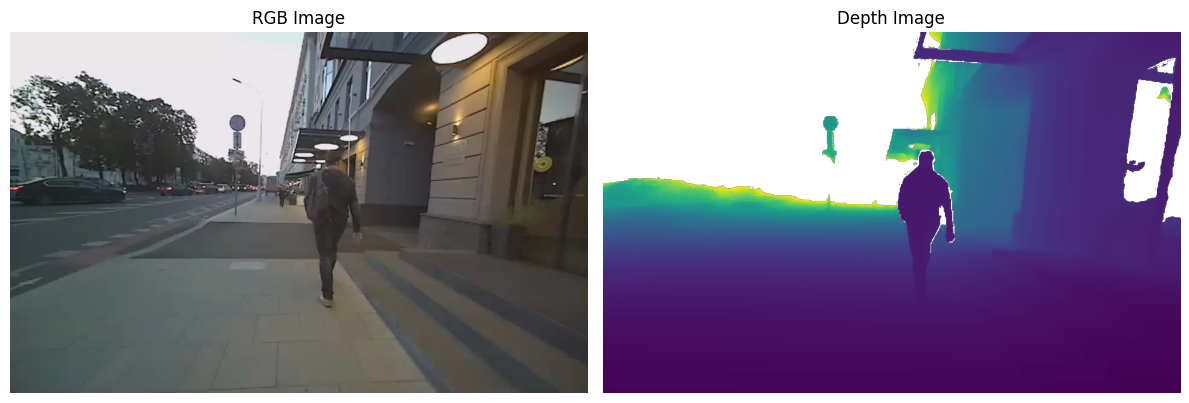

In [8]:
idx = np.random.randint(0, len(ds))
img_rgb = ds[idx]["rgb"]
img_depth = ds[idx]["depth"]
pose_2d = ds[idx]["pose_2d"]

print("pos")
print(f"Pose 2D (bird's eye view): {pose_2d}")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(img_rgb)
axes[0].set_title('RGB Image')
axes[0].axis('off')  # Turn off axes values
axes[1].imshow(img_depth)
axes[1].set_title('Depth Image')
axes[1].axis('off')  # Turn off axes values
plt.tight_layout()
plt.show()



### Specify trajectories and modalities

In [9]:
ds = EgoWalkBaseDataset(repo_id=REPO_ID,
                        root=None,
                        trajectories=["2024_08_15__19_55_49",
                                      "2024_12_10__20_17_45"],
                        modalities=["rgb", "pose_3d", "height"])

In [10]:
print(f"{len(ds)} frames")
print(seconds_to_human_readble_time(len(ds) / EXTRACTION_FPS))

18840 frames
01h 02m 48s


Pose 3D: [ 7.21073730e+02  7.56390285e+00 -1.80510330e+01  4.02155183e-02
  7.87382424e-02 -2.75291055e-01  9.57286656e-01]
Height: 1.3


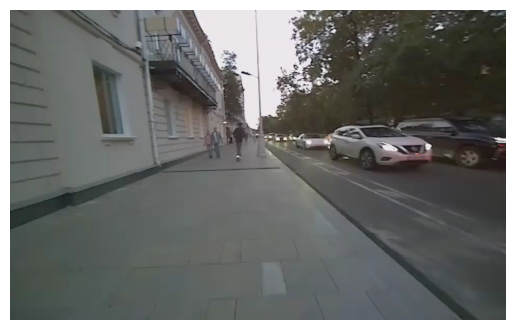

In [11]:
idx = np.random.randint(0, len(ds))
img_rgb = ds[idx]["rgb"]
pose_3d = ds[idx]["pose_3d"]
height = ds[idx]["height"]

print(f"Pose 3D: {pose_3d}")
print(f"Height: {height}")

plt.figure()
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

Pose 3D: [nan nan nan nan nan nan nan]
Height: 1.21


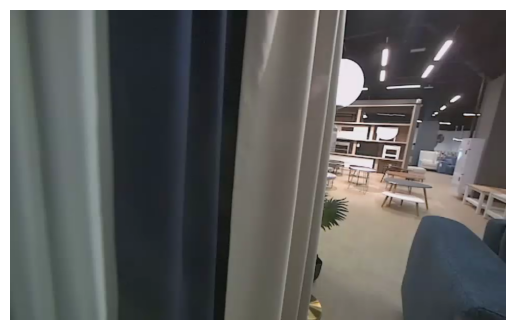

In [12]:
item = ds.get_trajectory_item("2024_12_10__20_17_45",
                              np.random.randint(0, ds.get_trajectory_length("2024_12_10__20_17_45")))

img_rgb = item["rgb"]
pose_3d = item["pose_3d"]
height = item["height"]

print(f"Pose 3D: {pose_3d}")
print(f"Height: {height}")

plt.figure()
plt.imshow(img_rgb)
plt.axis('off')
plt.show()